In [1]:
#importing all necessary packages and definning parameter value:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
plt.rcParams['figure.figsize'] = (10.0,7.0)
plt.rcParams['figure.constrained_layout.use']= True
plt.rc('font',size=18)

#plot_the_import_dataset_Wee2.csv and rename the column values.
df = pd.read_csv('Week_2.csv',header = None,skiprows =1)
df.columns=['X1','X2','Y']
#check data are imported correctly or not
print(df.head())
#plot the graph
sbn.scatterplot(x='X1',y='X2', hue='Y', s=150, palette =['darkblue','lawngreen'], marker='+', data=df)
plt.show()















     X1    X2  Y
0 -0.47  0.83 -1
1 -0.76 -0.52  1
2 -0.45 -0.61  1
3  0.80 -0.26  1
4 -0.41 -0.58  1


<Figure size 1000x700 with 1 Axes>

In [2]:
#Assign each column Values:
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]

In [3]:
#Train the model and predict the output parameters using logistic regression.
#Trainning data contains the entire idependent features. To increase the accuracy of the trained model.
#Therefore not opting for test split function. 
Xtrain = X
ytrain = y
model = LogisticRegression(penalty='none',solver='lbfgs')
model.fit(Xtrain, ytrain)
#print the calculated 'y_intercept' and 'slope values for corresponding inputs like X1 and X2'
print(model.intercept_, model.coef_)




[2.11498181] [[ 0.24436103 -3.73200988]]


In [4]:
#Predict the output for by taking training data as input
#y_pred_val=(0.24436103*X1 + (-3.73200988 * X2) + 2.11498181)

y_pred = np.sign(0.24436103*X1 + (-3.73200988 * X2) + 2.11498181)
# cay_pred=model.predict(Xtrain)n also be used to get the output. Both ways the output are same.

#Append the predicted output as a column on to original data frame.
df['y_predicted']=y_pred



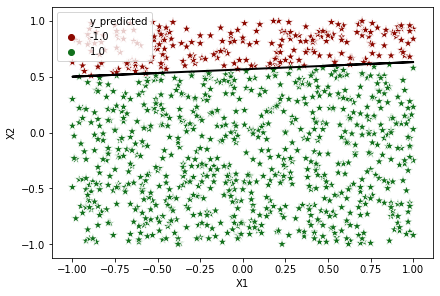

     X1    X2  Y  y_predicted
0 -0.47  0.83 -1         -1.0
1 -0.76 -0.52  1          1.0
2 -0.45 -0.61  1          1.0
3  0.80 -0.26  1          1.0
4 -0.41 -0.58  1          1.0


In [5]:
#plot the result obtained
sbn.set_color_codes("dark")
sbn.scatterplot(x='X1',y='X2', hue='y_predicted',palette=['r','g'],marker='*',s=100, data=df)
#calculating the decision boundary
#calculated by y=mx1+mx2+c (Where y=0)
decision_boundary=((-0.24436103*X1)-2.11498181)/-3.73200988
plt.plot(X1,decision_boundary,color ='black',linewidth=2)
plt.show()
#Verifying the column addition part.
print(df.head())

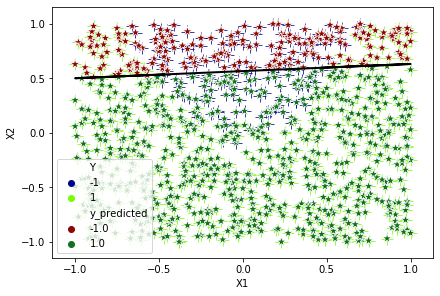

In [6]:
#combining the graph of original Y and predicted Y value
sbn.scatterplot(x='X1',y='X2', hue='Y', s=150, palette =['darkblue','lawngreen'], marker='+', data=df)
sbn.scatterplot(x='X1',y='X2', hue='y_predicted',palette=['r','g'],marker='*',s=100, data=df)
plt.plot(X1,decision_boundary,color ='black',linewidth=2)
plt.show()

In [7]:
#Comparion between y_predicted and original y values.
#Cost here is used to calculate the error value.
Cost = np.empty(shape=[0, 1])
Cost=y-y_pred
df['Cost']=Cost
x=df.loc[df['Cost'] != 0].shape
print (x)
#Checking the accuracy of the model.
print(model.score(Xtrain,ytrain))

(194, 5)
0.8058058058058059


In [9]:
#export the findings into a csv file
pd.DataFrame(df).to_csv('Week2_LR_2_feature_results.csv',index=False)

In [ ]:
Xpoly_3 = PolynomialFeatures(3).fit_transform(X)
#train and test for polynomial = 1 and range of C values in logistic regression.
mean_error_3=[]; std_error_3=[]; scores_3=[];
Ci_range = [0.01, 0.1, 1, 5, 10, 25, 50, 100]
for Ci in Ci_range:
    temp_3=[]
    model_3 = LogisticRegression(C=Ci, solver='lbfgs')
    scores_3.append(cross_val_score(model_3, Xpoly_3, y, cv=10, scoring='accuracy').mean())
    kf = KFold(n_splits=5)
    for train, test in kf.split(Xpoly_3):
        model_3.fit(Xpoly_3[train], y[train])
        ypred_3 = model_3.predict(Xpoly_3[test])
        temp_3.append(mean_squared_error(y[test],ypred_3))
    mean_error_3.append(np.array(temp_3).mean())
    std_error_3.append(np.array(temp_3).std())
print(scores_3)
print(mean_error_3)
print(std_error_3)
plt.errorbar(Ci_range,mean_error_3,yerr=std_error_3)
plt.legend(["For_ypredict_poly_3"])
plt.xlabel('Ci'); plt.ylabel('Mean square error')
plt.xlim((0,25))
plt.show()
